## Project - Popular DS Questions StackExchange

The aim of the following analysis is to use Data Science Stack Exchange to determine what content should a data science education company create, based on the interest by subject. In Stack Exchange each post, meaning each question/answer — is subject to upvotes and downvotes. This makes good posts easily identifiable.Stack Exchange provides a public data base for each of its websites. Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database. 

![Image](https://dq-content.s3.amazonaws.com/469/dsde.png)

We will use the __posts__ table since the tags columns is useful in categorzing the content. Some columns that are relevant for our goal:

`Id`: An identification number for the post.

`PostTypeId`: An identification number for the type of post.

`CreationDate`: The date and time of creation of the post.

`Score`: The post's score.

`ViewCount`: How many times the post was viewed.

`Tags`: What tags were used.

`AnswerCount`: How many answers the question got (only applicable to question posts).

`FavoriteCount`: How many times the question was favored (only applicable to question posts).

We'll limit our analysis to the posts of 2019.

### Getting the Data

To get the data we need te run the follwoing query against the Data Science Stack Exchange's database.

`SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;`

![Image](https://images.unsplash.com/photo-1460925895917-afdab827c52f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2015&q=80)
_Photo by Carlos Muza on Unsplash_

### Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
questions=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 11/QueryResults.csv", parse_dates=["CreationDate"])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6751 entries, 0 to 6750
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6751 non-null   int64         
 1   CreationDate   6751 non-null   datetime64[ns]
 2   Score          6751 non-null   int64         
 3   ViewCount      6751 non-null   int64         
 4   Tags           6751 non-null   object        
 5   AnswerCount    6751 non-null   int64         
 6   FavoriteCount  160 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 369.3+ KB


We can see that the column named _FavoriteCount_ has missing values. The data types seem appropriate, but for _Tags_, we should investigate further and establish with more precison what types the objects in the columns are. Also _FavoriteCount_ should be converted to int.

In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60124,2019-09-12 16:00:22,1,38,<algorithms>,0,NaN
1,60126,2019-09-12 17:34:38,1,4589,<python><keras><reshape>,2,NaN
2,60127,2019-09-12 17:51:00,2,1252,<tensorflow>,0,NaN
3,60128,2019-09-12 17:51:29,1,9,<image-classification><computer-vision><image-...,0,NaN
4,60129,2019-09-12 18:10:24,1,31,<machine-learning><recommender-system><transfe...,0,NaN


In [5]:
questions["Tags"].apply(lambda value: type(value))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
6746    <class 'str'>
6747    <class 'str'>
6748    <class 'str'>
6749    <class 'str'>
6750    <class 'str'>
Name: Tags, Length: 6751, dtype: object

### Cleaning the Data

In [6]:
#Fill in the missing values with 0
questions.fillna(0, inplace=True)

We want to transform the values in questions["Tags"] in something more suitable to use typical string methods. We will transform and clean the column and after the process that we just illustrated, we will split on `,` to obtain a list.

In [7]:
questions["Tags"]=questions["Tags"].str.replace("<","")
questions["Tags"]=questions["Tags"].str.replace(">"," ")
questions["Tags"]=questions["Tags"].str.split()

In [8]:
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

In [9]:
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60124,2019-09-12 16:00:22,1,38,[algorithms],0,0
1,60126,2019-09-12 17:34:38,1,4589,"[python, keras, reshape]",2,0
2,60127,2019-09-12 17:51:00,2,1252,[tensorflow],0,0
3,60128,2019-09-12 17:51:29,1,9,"[image-classification, computer-vision, image-...",0,0
4,60129,2019-09-12 18:10:24,1,31,"[machine-learning, recommender-system, transfe...",0,0
...,...,...,...,...,...,...,...
6746,60108,2019-09-12 10:03:44,1,45,[svm],1,0
6747,60112,2019-09-12 11:05:10,3,380,"[categorical-data, missing-data, encoding]",1,0
6748,60113,2019-09-12 11:13:22,0,997,"[python, pandas, data-cleaning, dataframe]",3,0
6749,60119,2019-09-12 13:30:23,3,152,"[python, scikit-learn, pandas, numpy]",1,0


In [10]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

### Most Used and Most Viewed Tags
To determine the most popular tags, we will use two proxies: the number of times each tag was used, and how many times a question with that tag was viewed.

In [11]:
#Counting how many times each tag was used
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [12]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
algorithms,48
python,1438
keras,705
reshape,6
tensorflow,409
image-classification,161
computer-vision,89
image-recognition,56
machine-learning,2127
recommender-system,65


In [13]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,172
feature-selection,175
r,194
predictive-modeling,211
clustering,229
dataset,245
regression,269
lstm,287
pandas,315
time-series,334


<AxesSubplot:title={'center':'Counting how many times each tag was used'}>

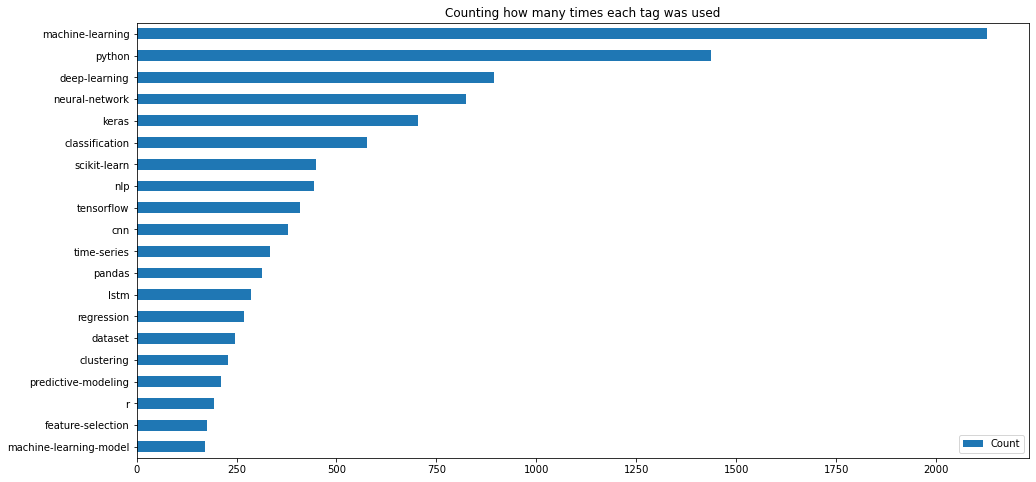

In [14]:
most_used.plot(kind="barh", figsize=(16,8), title='Counting how many times each tag was used')

<AxesSubplot:title={'center':'Counting how many times each tag was viewed'}>

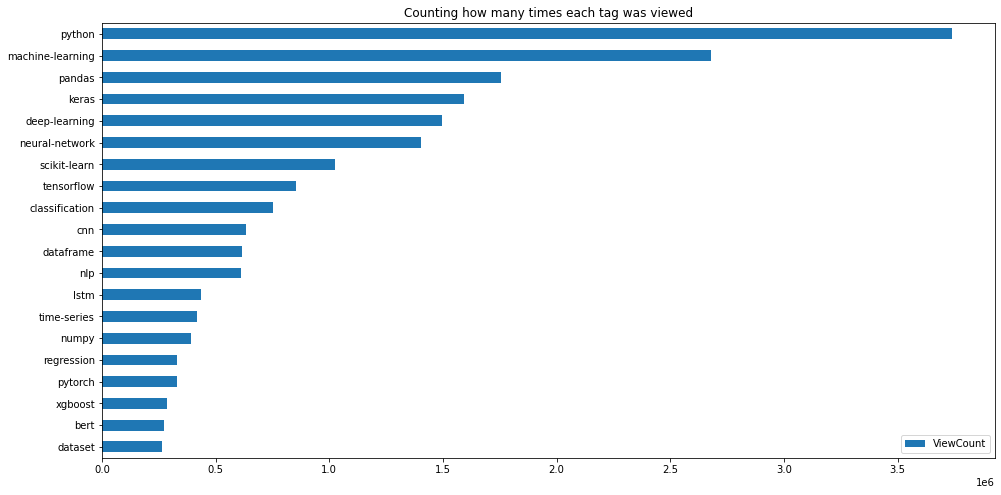

In [15]:
#Counting how many times each tag was viewed
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8), title='Counting how many times each tag was viewed')

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

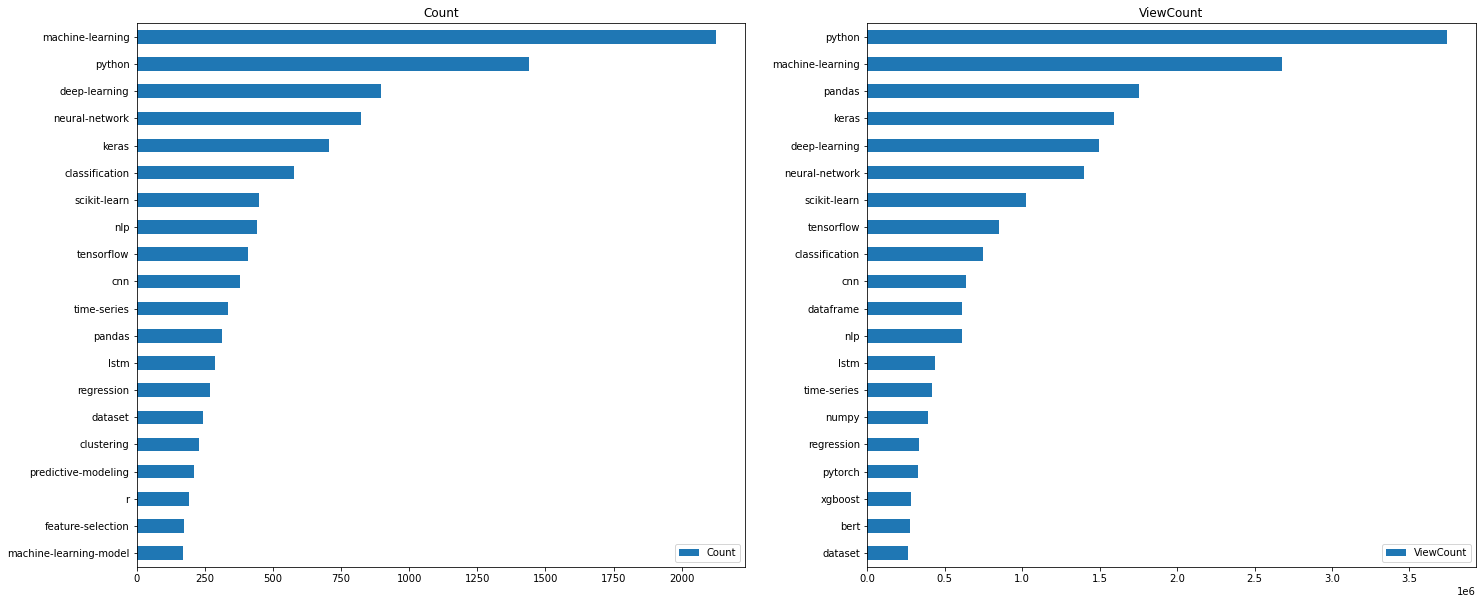

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

### Relations Between Tags

We can see that most top tags are present in both dataframes.To see what tags are in most_used, but not in most_viewed and the other way around, we can identify them by the missing values using the pd.merge() method.

In [17]:
pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

,Count,ViewCount
machine-learning-model,172,NaN
feature-selection,175,NaN
r,194,NaN
predictive-modeling,211,NaN
clustering,229,NaN
dataset,245,263802.0
regression,269,332077.0
lstm,287,437091.0
pandas,315,1754184.0
time-series,334,416942.0


In [18]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,Count,ViewCount
dataset,245.0,263802
bert,NaN,274240
xgboost,NaN,284139
pytorch,NaN,330152
regression,269.0,332077
numpy,NaN,390664
time-series,334.0,416942
lstm,287.0,437091
nlp,443.0,612824
dataframe,NaN,614365


The tags present in most_used and not present in most_viewed are:
* machine-learning-model
* statistics
* predictive-modeling
* r

And the tags present in most_viewed but not in most_used are:

* csv
* pytorch
* dataframe

To determine how pairs of tags are related to each other, we will count how many times each pair appears together.

In [19]:
all_tags = list(tag_count.index)

In [20]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations

,algorithms,python,keras,reshape,tensorflow,image-classification,computer-vision,image-recognition,machine-learning,recommender-system,...,crawling,movielens,momentum,allennlp,manifold,redshift,data-indexing-techniques,multivariate-distribution,open-source,history
algorithms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reshape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
redshift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-indexing-techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multivariate-distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open-source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1
print(associations[:4])

            algorithms  python  keras  reshape  tensorflow  \
algorithms          48       6      0        0           1   
python               6    1438    204        2         119   
keras                0     204    705        2         196   
reshape              0       2      2        6           0   

            image-classification  computer-vision  image-recognition  \
algorithms                     0                0                  0   
python                        21               19                  5   
keras                         37               11                  4   
reshape                        0                0                  0   

            machine-learning  recommender-system  ...  crawling  movielens  \
algorithms                23                   0  ...         0          0   
python                   401                  10  ...         1          0   
keras                    147                   2  ...         0          0   
reshape         

In [22]:
#We will focus only on the most used tags
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,feature-selection,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,tensorflow,nlp,scikit-learn,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,172,7,5,17,3,10,5,3,1,5,3,6,5,15,21,12,9,11,27,105
feature-selection,7,175,5,16,3,4,10,1,2,6,1,0,4,19,17,1,7,18,23,81
r,5,5,194,11,16,5,7,3,1,18,1,1,3,1,8,8,6,4,19,48
predictive-modeling,17,16,11,211,0,5,23,7,4,23,5,2,1,11,23,9,8,23,29,98
clustering,3,3,16,0,229,5,1,2,5,18,0,0,12,23,10,0,4,2,42,52
dataset,10,4,5,5,5,245,4,5,9,3,8,5,10,6,20,8,18,22,39,76
regression,5,10,7,23,1,4,269,9,6,19,4,6,2,33,29,24,40,19,50,100
lstm,3,1,3,7,2,5,9,287,6,59,18,26,20,1,13,96,48,74,41,43
pandas,1,2,1,4,5,9,6,6,315,16,1,2,4,31,3,2,1,1,218,57
time-series,5,6,18,23,18,3,19,59,16,334,7,6,0,7,19,34,25,30,76,104


In [23]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

<AxesSubplot:>

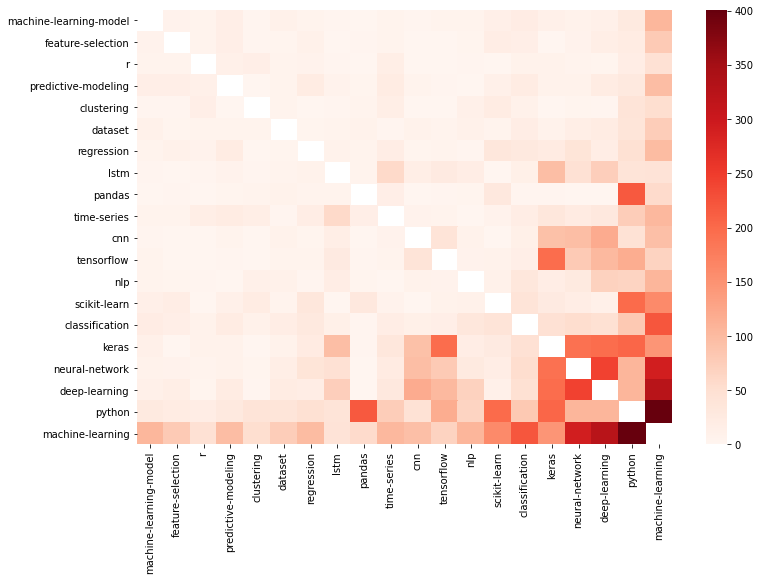

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Reds", annot=False)

It seems like python, ML, deep-learning, neural-network are the mpst popular topics in the DS field on Stack Exchange.

### Further investigating deep-learning

Next we want to see if the interest in deep-learning could be slowing down, meaning if it was just a fad in 2019. For this we will analyze a dataset containing all the questions ever asked on DSSE, alon gwith their dates and tags.


In [25]:
all_questions=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 11/all_questions.csv", parse_dates=["CreationDate"])
all_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [26]:
#We will clean the Tags columns same as before.

all_questions["Tags"]=all_questions["Tags"].str.replace("<","")
all_questions["Tags"]=all_questions["Tags"].str.replace(">"," ")
all_questions["Tags"]=all_questions["Tags"].str.split()

We will consider a deep learning tag as being a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. We'll now create a function that assigns 1 to deep learning questions and 0 otherwise.

In [27]:
def deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [28]:
all_questions["DeepLearning"] = all_questions["Tags"].apply(deep_learning)
all_questions

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1


Next we will add a new columns that identifies the quarter of every year for each post

In [29]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020].copy()

In [30]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

In [31]:
all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)
all_questions

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18Q3


In [32]:
all_questions

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1
...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18Q3


Next we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between them.

In [33]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

quarterly.reset_index(inplace=True)
quarterly.head()

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592


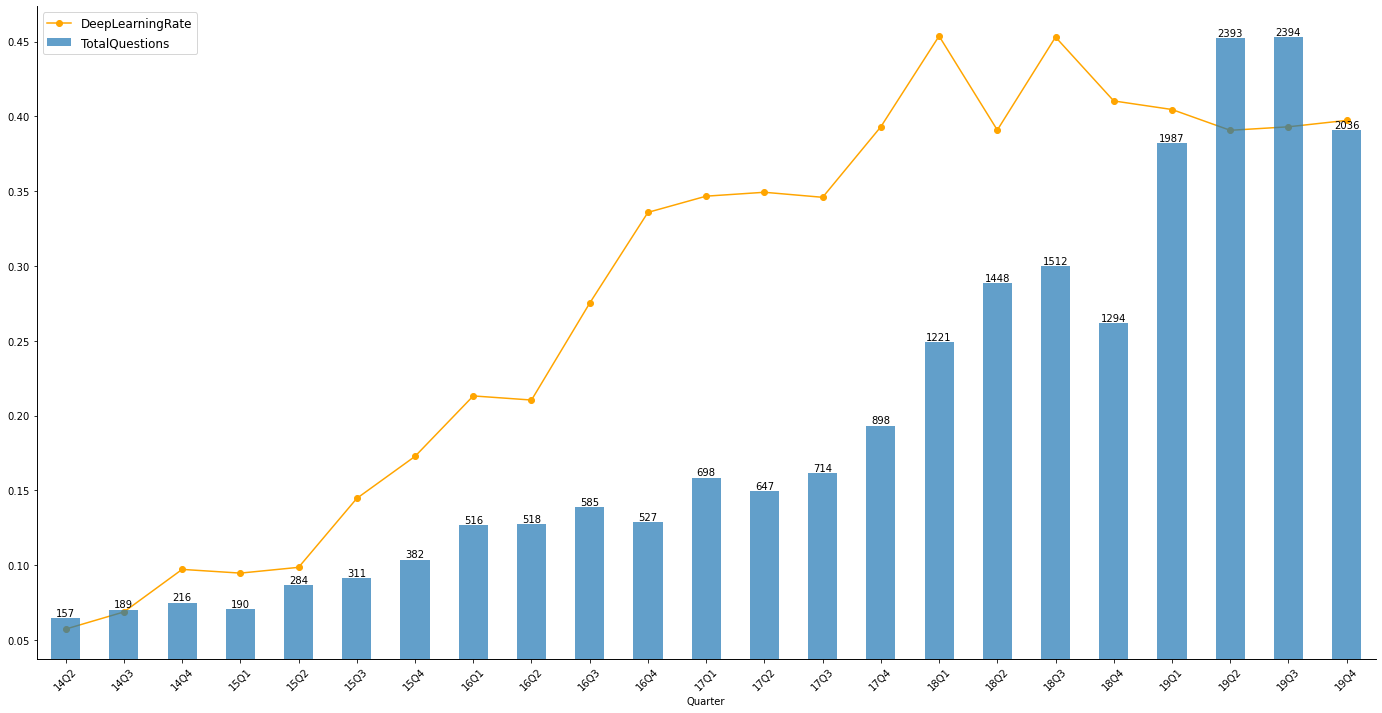

In [34]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)
for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

From the visualisation abobe it seems like the topic of deep-learning was not just a fad and has the potential to grow.